In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [11]:
resident_apartment = pd.read_csv('연도별_인구수와_아파트_매매_실거래가.csv', sep=',')
resident_apartment

,읍면동,2017_res,2018_res,2019_res,2020_res,2017_apt,2018_apt,2019_apt,2020_apt
0,세종특별자치시,279046,313055,339434,354705,27518.355960,31075.765290,38340.645140,42450.154210
1,조치원읍,45101,44153,42952,42789,16003.230140,15823.178990,15486.207180,19746.889330
2,연기면,2723,2645,2520,2671,0.000000,0.000000,0.000000,0.000000
3,연동면,3417,3255,3149,3123,6175.000000,6862.142857,6324.413793,7101.304348
4,부강면,6462,6344,6255,6196,7816.666667,7468.750000,7938.095238,8078.793103
5,금남면,9298,9062,8682,8790,12343.333330,11809.210530,12765.322580,17884.793810
6,장군면,6302,6103,6180,6621,2650.000000,2592.857143,2763.636364,3355.000000
7,연서면,7875,7703,7470,7434,11309.090910,11540.000000,11195.238100,13736.111110
8,전의면,6255,5987,5761,5590,8146.551724,8279.545455,7555.357143,7432.368421
9,전동면,3859,3731,3686,3509,5628.571429,6000.000000,5900.000000,5445.000000


In [15]:
apt_corr = resident_apartment.corr()
print(apt_corr)

          2017_res  2018_res  2019_res  2020_res  2017_apt  2018_apt  \
2017_res  1.000000  0.993627  0.989528  0.988489  0.251503  0.135005   
2018_res  0.993627  1.000000  0.999151  0.993299  0.275317  0.173172   
2019_res  0.989528  0.999151  1.000000  0.993365  0.288775  0.191516   
2020_res  0.988489  0.993299  0.993365  1.000000  0.245500  0.194582   
2017_apt  0.251503  0.275317  0.288775  0.245500  1.000000  0.673183   
2018_apt  0.135005  0.173172  0.191516  0.194582  0.673183  1.000000   
2019_apt  0.192140  0.220914  0.237300  0.241742  0.637972  0.989053   
2020_apt  0.127576  0.155977  0.172085  0.173663  0.585502  0.978845   

          2019_apt  2020_apt  
2017_res  0.192140  0.127576  
2018_res  0.220914  0.155977  
2019_res  0.237300  0.172085  
2020_res  0.241742  0.173663  
2017_apt  0.637972  0.585502  
2018_apt  0.989053  0.978845  
2019_apt  1.000000  0.990705  
2020_apt  0.990705  1.000000  


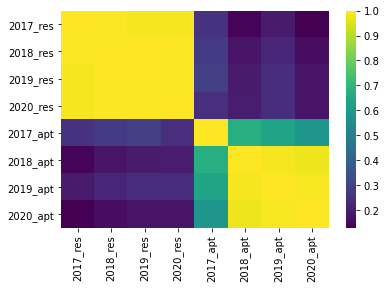

In [16]:
sns.heatmap(apt_corr, cmap='viridis')
plt.show()

In [18]:
apt_re = resident_apartment.corr(method='pearson')
print(apt_re)

          2017_res  2018_res  2019_res  2020_res  2017_apt  2018_apt  \
2017_res  1.000000  0.993627  0.989528  0.988489  0.251503  0.135005   
2018_res  0.993627  1.000000  0.999151  0.993299  0.275317  0.173172   
2019_res  0.989528  0.999151  1.000000  0.993365  0.288775  0.191516   
2020_res  0.988489  0.993299  0.993365  1.000000  0.245500  0.194582   
2017_apt  0.251503  0.275317  0.288775  0.245500  1.000000  0.673183   
2018_apt  0.135005  0.173172  0.191516  0.194582  0.673183  1.000000   
2019_apt  0.192140  0.220914  0.237300  0.241742  0.637972  0.989053   
2020_apt  0.127576  0.155977  0.172085  0.173663  0.585502  0.978845   

          2019_apt  2020_apt  
2017_res  0.192140  0.127576  
2018_res  0.220914  0.155977  
2019_res  0.237300  0.172085  
2020_res  0.241742  0.173663  
2017_apt  0.637972  0.585502  
2018_apt  0.989053  0.978845  
2019_apt  1.000000  0.990705  
2020_apt  0.990705  1.000000  


<AxesSubplot:>

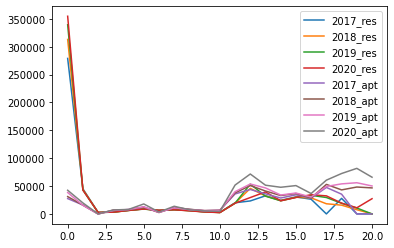

In [19]:
resident_apartment.plot()

In [20]:
dir(resident_apartment)

['T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__re

<AxesSubplot:xlabel='2017_res', ylabel='2017_apt'>

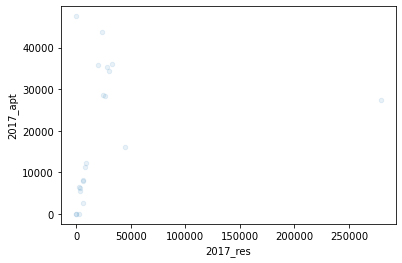

In [21]:
resident_apartment.plot(kind="scatter", x="2017_res", y="2017_apt", alpha=0.1)

In [22]:
dong_res_sold = pd.read_csv('읍면동_인구수_주택매매가_total.csv', sep=',')
dong_res_sold

,읍면동,2017_res,2018_res,2019_res,2020_res,2017_apt,2018_apt,2019_apt,2020_apt,2017_multi,...,2019_multi,2020_multi,2017_single,2018_single,2019_single,2020_single,2017_office,2018_office,2019_office,2020_office
0,세종특별자치시,279046,313055,339434,354705,27518.355960,31075.765290,38340.645140,42450.154210,6007.696335,...,10271.855560,8991.880309,42482.87419,36557.67589,35819.01500,36495.66404,10072.95833,9856.357143,9092.634146,9192.313084
1,조치원읍,45101,44153,42952,42789,16003.230140,15823.178990,15486.207180,19746.889330,5760.945946,...,7412.000000,8186.785714,46629.31304,42030.18841,36921.74000,29305.33036,6100.00000,0.000000,12100.000000,0.000000
2,연기면,2723,2645,2520,2671,0.000000,0.000000,0.000000,0.000000,9112.500000,...,10137.500000,8764.705882,41857.85185,59408.33333,54876.36364,56178.81818,0.00000,0.000000,0.000000,0.000000
3,연동면,3417,3255,3149,3123,6175.000000,6862.142857,6324.413793,7101.304348,0.000000,...,0.000000,0.000000,19833.33333,22514.44444,27340.00000,31369.20000,0.00000,0.000000,0.000000,0.000000
4,부강면,6462,6344,6255,6196,7816.666667,7468.750000,7938.095238,8078.793103,5166.666667,...,14329.911760,7073.750000,55455.55556,53011.53846,44872.94118,38457.64000,0.00000,0.000000,0.000000,19000.000000
5,금남면,9298,9062,8682,8790,12343.333330,11809.210530,12765.322580,17884.793810,11250.000000,...,6700.000000,10428.571430,39055.02857,38951.56667,31149.20000,40822.13333,0.00000,0.000000,0.000000,0.000000
6,장군면,6302,6103,6180,6621,2650.000000,2592.857143,2763.636364,3355.000000,3800.000000,...,14800.000000,13000.000000,65170.23256,49970.22857,46337.20000,55625.74510,0.00000,0.000000,0.000000,0.000000
7,연서면,7875,7703,7470,7434,11309.090910,11540.000000,11195.238100,13736.111110,7337.500000,...,6600.000000,5418.750000,27420.00000,24912.54545,31449.00000,25778.64865,0.00000,0.000000,0.000000,0.000000
8,전의면,6255,5987,5761,5590,8146.551724,8279.545455,7555.357143,7432.368421,6030.769231,...,5854.166667,4725.000000,18664.60000,19351.11111,19655.90909,28951.45833,0.00000,0.000000,0.000000,0.000000
9,전동면,3859,3731,3686,3509,5628.571429,6000.000000,5900.000000,5445.000000,3400.000000,...,5000.000000,0.000000,12196.64286,13053.71429,15370.00000,18656.78261,0.00000,0.000000,0.000000,0.000000


In [23]:
total_corr = dong_res_sold.corr()
print(total_corr)

             2017_res  2018_res  2019_res  2020_res  2017_apt  2018_apt  \
2017_res     1.000000  0.993627  0.989528  0.988489  0.251503  0.135005   
2018_res     0.993627  1.000000  0.999151  0.993299  0.275317  0.173172   
2019_res     0.989528  0.999151  1.000000  0.993365  0.288775  0.191516   
2020_res     0.988489  0.993299  0.993365  1.000000  0.245500  0.194582   
2017_apt     0.251503  0.275317  0.288775  0.245500  1.000000  0.673183   
2018_apt     0.135005  0.173172  0.191516  0.194582  0.673183  1.000000   
2019_apt     0.192140  0.220914  0.237300  0.241742  0.637972  0.989053   
2020_apt     0.127576  0.155977  0.172085  0.173663  0.585502  0.978845   
2017_multi   0.161466  0.145088  0.133275  0.129943 -0.427379 -0.634319   
2018_multi   0.157301  0.114367  0.102604  0.109515 -0.139295 -0.347982   
2019_multi   0.170683  0.167019  0.176049  0.175831 -0.113082 -0.340134   
2020_multi   0.196387  0.185733  0.189760  0.197344  0.021514 -0.235263   
2017_single  0.212915  0.

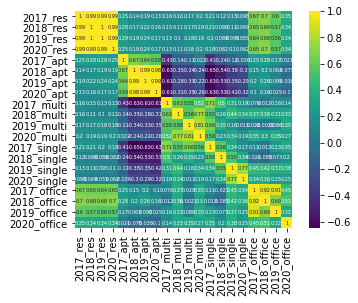

In [26]:
sns.heatmap(total_corr, annot=True, annot_kws={'size':5}, square= True, cmap='viridis')
plt.show()

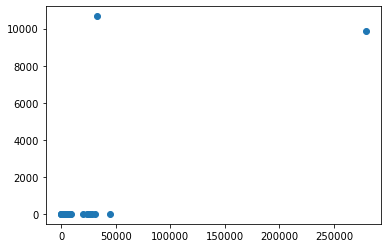

In [38]:
plt.scatter(dong_res_sold['2017_res'],dong_res_sold['2018_office'])
plt.show()